# Superstore Analysis

> @jhbale11
> Author : Jung Hwan Kim
> Purpose : Vizable Project

## 배경

미국의 Superstore에서 2018-2021까지의 기간 동안 발생한 주문에 대한 데이터셋입니다.

## 데이터 명세

아래와 같은 21가지의 Feature를 포함하고 있습니다.
- `'Row ID'` - Serial Number
- `'Order ID'` - 상품 주문시 생성되는 ID
- `'Order Date'` - 고객이 주문한 날짜
- `'Ship Date'` - 상품이 수송된 날짜
- `'Ship Mode'` - 수송 방법
- `'Customer ID'` - 고객 별로 부여된 고유 ID
- `'Customer Name'` - 고객의 실명
- `'Segment'` - 상품 구매가 발생한 Section
- `'Country'` - 미국 Superstore이므로 오로지 미국만 포함
- `'City'` - Cities of US
- `'State'` - States of US
- `'Postal Code'` - Pin code
- `'Region'` - 동서남북으로 묶을 수 있는 지역 범위
- `'Product ID'` - 상품의 고유 ID
- `'Category'` - 상품의 카테고리
- `'Sub-Category'` - 상품의 서브 카테고리
- `'Product Name'` - 상품의 고유명
- `'Sales'` - 매출
- `'Quantity'` - 주문 수량
- `'Discount'` - 주문시 할인율
- `'Profit'` - 이익

----
## IMPORTING LIBRARIES¶
List of all the python libraries that are required:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams

%matplotlib inline

import warnings
warnings.simplefilter(action="ignore")

---
## LOAD DATA

데이터를 불러옵니다. `Tableau 2021.04` Version의 'Sample - Superstore' 데이터를 불러옵니다.

In [2]:
df = pd.read_excel('data/Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
print('Shape of our dataframe is :' +str(df.shape))

Shape of our dataframe is :(9994, 21)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
print(df['Order Date'].min())
print(df['Order Date'].max())

2018-01-03 00:00:00
2021-12-30 00:00:00


- 데이터는 21개의 `FEATURE`로 이루어져 있습니다.
- 2018년부터 2021년까지의 데이터로 구성되어 있습니다.

-----
## DATA PREPROCESSING

주어진 데이터에 결측치가 있는지 확인하고 전처리를 진행하겠습니다.

In [7]:
pd.DataFrame(df.isnull().sum(), columns = ["Missing values"])

,Missing values
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country/Region,0
City,0


In [8]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2021-104066,2021-12-05,2021-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2019-162887,2019-11-07,2019-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2020-150140,2020-04-06,2020-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2020-165505,2020-01-23,2020-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2020-165505,2020-01-23,2020-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2020-165505,2020-01-23,2020-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2021-127292,2021-01-19,2021-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2021-127292,2021-01-19,2021-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2021-127292,2021-01-19,2021-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2021-127292,2021-01-19,2021-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


- `Postal Code`에 11개의 결측치가 존재함을 확인할 수 있습니다.
- 데이터에 대해 살펴본 결과 11개의 결측치는 Vermont주 Burlington 도시에서 이루어진 주문건에서 발생한 것으로 파악됩니다. Burington에서 발생한 모든 구매에 대해 Postal Code가 입력되지 않은 것으로 보입니다.
- 결측치를 단순히 `drop`할 경우 분석에 영향을 미칠 수 있으므로, 다른 값으로 대치하고자 하였고 미국의 Postal Code를 알아본 결과 Burlington의 Postla Code가 `05408`임을 알 수 잇었습니다.

In [9]:
df = df.fillna(5408)
df["Postal Code"]= df["Postal Code"].astype(int)

In [10]:
pd.DataFrame(df.isnull().sum(), columns = ["Missing values"])

,Missing values
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country/Region,0
City,0


In [11]:
df.duplicated().sum()

0

- 중복값이 없는 것을 확인할 수 있습니다.

-----
- `Row ID`는 단순히 Row 순서를 나타내는 ID이므로 이 Column을 drop하겠습니다.
- 최종적으로 전처리한 데이터는 아래와 같습니다.

In [12]:
df=df.drop('Row ID',axis=1)

## DDA(Descriptive Data Analysis)

- 전처리한 데이터에 대해 기초적인 통계적인 분석은 아래와 같습니다.

In [13]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


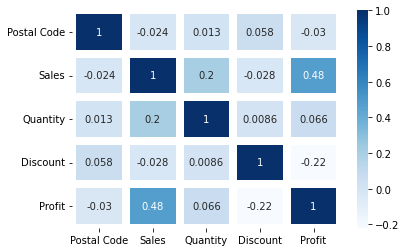

In [14]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', lw = 8, linecolor = 'white');

----
#### **Analysis :**
`sales`는 `profit`과 꽤 높은 양의 상관관계가 있으며, 
`discount`는 `profit`과 약한 음의 상관관계가 있음을 확인할 수 있습니다.

**=**  높은 sales와 적은 discounts를 통해 `more profit`을 창출할 수 있습니다.

---

## **UNIVARIATE ANALYSIS**

각각의 `Feature`들에 대한 Univariate Analysis를 `subplots`으로 나타내보겠습니다.

In [15]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

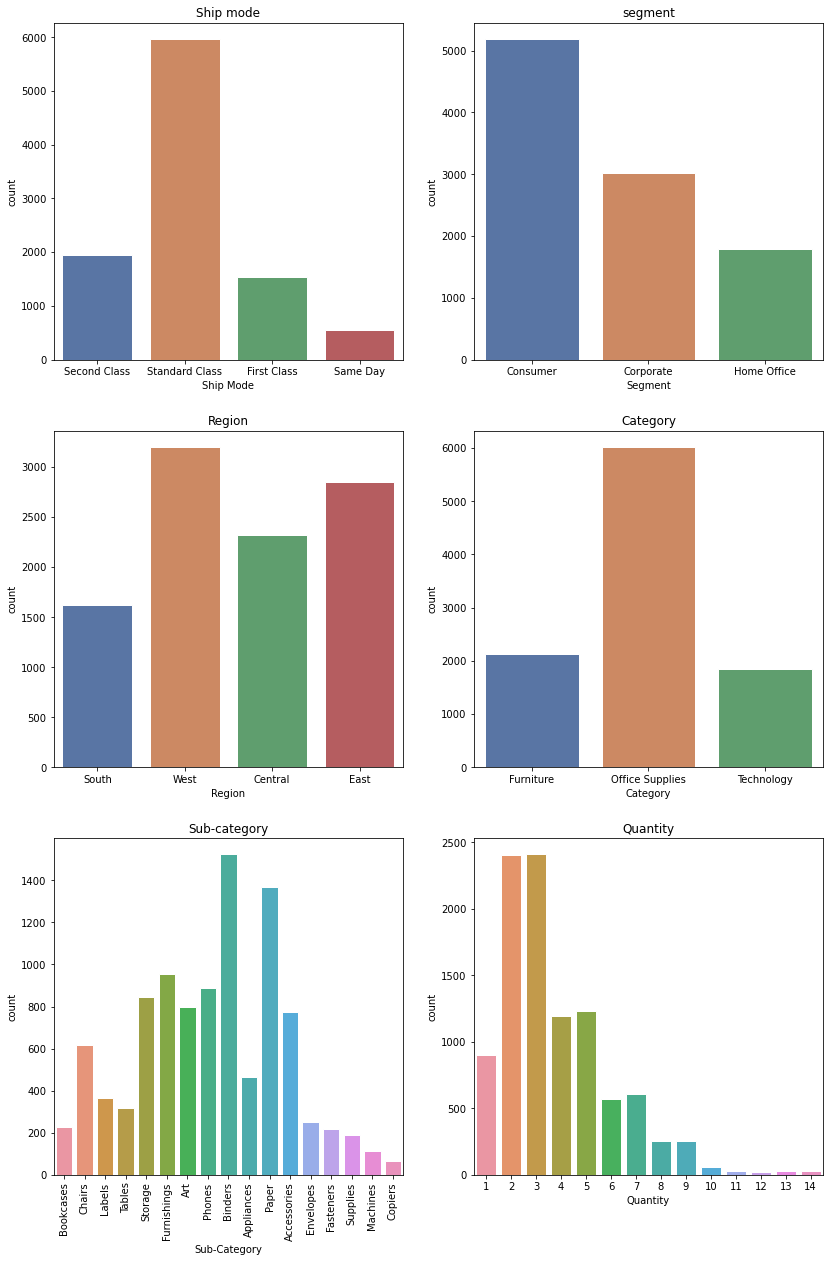

In [16]:
fig, axes = plt.subplots(3,2, figsize = (12,18))
sns.set_theme(style="darkgrid")
axes[0,0].set_title("Ship mode")
axes[0,1].set_title("segment")
axes[1,0].set_title("Region")
axes[1,1].set_title("Category")
axes[2,0].set_title("Sub-category")
axes[2,1].set_title("Quantity")

sns.countplot(x=df['Ship Mode'],
              orient='h',
              ax=axes[0,0])

sns.countplot(x=df['Segment'],
              orient='h',
              ax=axes[0,1])

sns.countplot(x=df['Region'],
              orient='h',
              ax=axes[1,0])

sns.countplot(x=df['Category'],
              orient='h',
              ax=axes[1,1])

sns.countplot(x=df['Sub-Category'],
              orient='h',
              ax=axes[2,0])

sns.countplot(x=df['Quantity'],
              orient='h',
              ax=axes[2,1])

axes[2,0].set_xticklabels(list(df['Sub-Category'].unique()), rotation=90)

plt.tight_layout(pad=2);

---
#### **Analysis:**

* `Standard class` ship-mode가 가장 많이 사용됩니다.
* `Consumer`가 가장 큰 Segment입니다.
* Superstores는 `west`에서 주문이 많고 `south`에서 주문이 가장 적습니다.
* Category 중 `office supplies`가 가장 많은 주문을 차지합니다.
* 가장 많이 팔리는 Sub-Category는 `binders`, `paper`입니다.
* 사람들은 2-3 정도의 `quanitites`를 빈번하게 주문합니다.

---

## **BIVARIATE ANALYSIS**

KPI 후보인 `profit`, `sales`,`quantities` 간의 분석을 통해 인사이트를 얻고자 합니다.

## 1. Ship-Mode

In [17]:
ship_df = pd.DataFrame(df.groupby(['Ship Mode'])[['Profit','Sales', 'Quantity']].sum())
ship_df.sort_values(by='Profit')

,Profit,Sales,Quantity
Ship Mode,,,
Same Day,15891.7589,1.283631e+05,1960
First Class,48969.8399,3.514284e+05,5693
Second Class,57446.6354,4.591936e+05,7423
Standard Class,164088.7875,1.358216e+06,22797


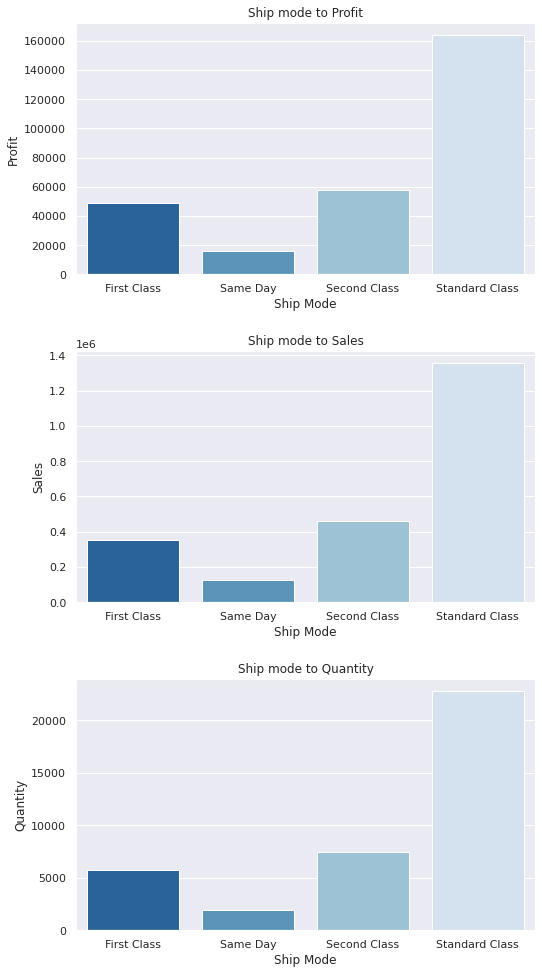

In [18]:
fig, axes = plt.subplots(3,1, figsize=(8,14))
sns.set_theme(style="darkgrid")
axes[0].set_title("Ship mode to Profit")
axes[1].set_title("Ship mode to Sales")
axes[2].set_title("Ship mode to Quantity")

sns.barplot(x=ship_df.index,
            y=ship_df['Profit'],
            data= ship_df,
            palette = 'Blues_r',
            ax = axes[0]);

sns.barplot(x=ship_df.index,
            y=ship_df['Sales'],
            data= ship_df,
            palette = 'Blues_r',
            ax = axes[1]);

sns.barplot(x=ship_df.index,
            y=ship_df['Quantity'],
            data= ship_df,
            palette = 'Blues_r',
            ax = axes[2])

plt.tight_layout(pad=2);

---
**Analysis :**

`Standard class`가 가장 많은 비율을 차지합니다. 아마 가장 싸고 일반적이기 때문일 것입니다.

---

## 2. Segment

In [19]:
segment_df = pd.DataFrame(df.groupby(['Segment'])[['Profit', 'Sales', 'Quantity']].sum())
segment_df.sort_values(by='Profit')

,Profit,Sales,Quantity
Segment,,,
Home Office,60298.6785,4.296531e+05,6744
Corporate,91979.1340,7.061464e+05,11608
Consumer,134119.2092,1.161401e+06,19521


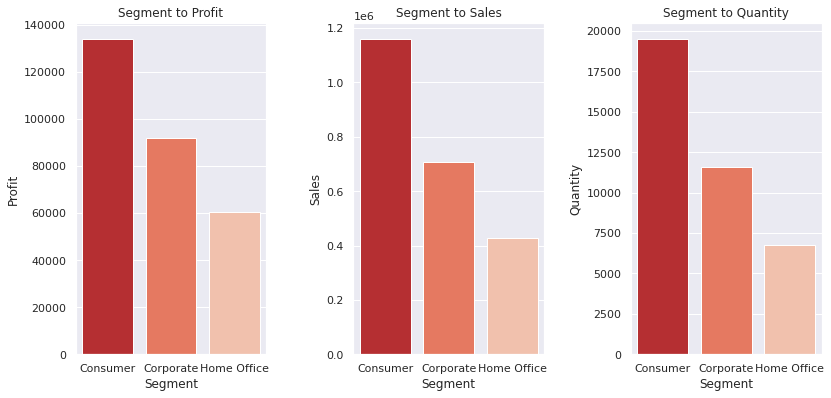

In [20]:
fig, axes = plt.subplots(1,3, figsize=(12,6))

sns.set_theme(style="darkgrid")
axes[0].set_title("Segment to Profit")
axes[1].set_title("Segment to Sales")
axes[2].set_title("Segment to Quantity")

sns.barplot(x=segment_df.index,
            y=segment_df['Profit'],
            data= segment_df,
            palette = 'Reds_r',
            ax= axes[0])

sns.barplot(x=segment_df.index,
            y=segment_df['Sales'],
            data= segment_df,
            palette = 'Reds_r',
            ax= axes[1])

sns.barplot(x=segment_df.index,
            y=segment_df['Quantity'],
            data= segment_df,
            palette = 'Reds_r',
            ax= axes[2])

plt.tight_layout(pad=2);

---
**Analysis :**

`Consumer` segment의 `profit`이 가장 높으며, 그 다음으로 Corporate Segment와 home offices 순입니다. 
따라서 마케팅 전략은 `consumers`의 수를 유지하거나, 증가시키는 방향으로 구사되어야 할 것입니다.

---

## 3. Region

In [21]:
region_df = pd.DataFrame(df.groupby(['Region'])[['Profit', 'Sales', 'Quantity']].sum())
region_df.sort_values(by='Profit')

,Profit,Sales,Quantity
Region,,,
Central,39706.3625,501239.8908,8780
South,46749.4303,391721.9050,6209
East,91522.7800,678781.2400,10618
West,108418.4489,725457.8245,12266


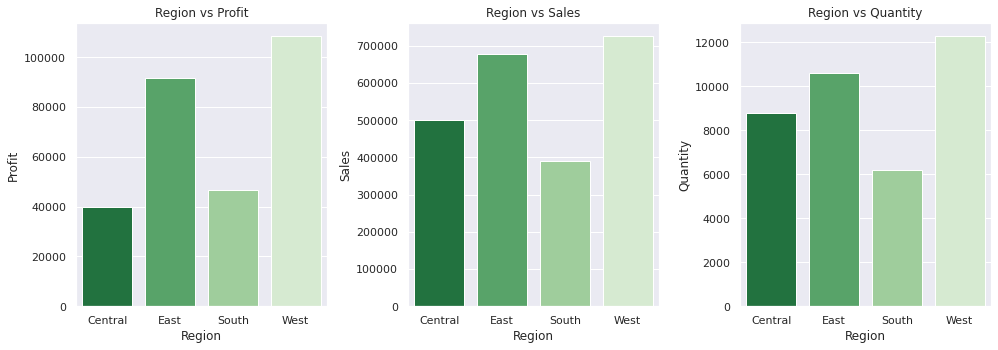

In [22]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

sns.set_theme(style="darkgrid")
axes[0].set_title("Region vs Profit")
axes[1].set_title("Region vs Sales")
axes[2].set_title("Region vs Quantity")

sns.barplot(x=region_df.index,
           y='Profit',
           data=region_df,
           palette='Greens_r',
           ax=axes[0])

sns.barplot(x=region_df.index,
           y='Sales',
           data=region_df,
           palette='Greens_r',
           ax=axes[1])

sns.barplot(x=region_df.index,
           y='Quantity',
           data=region_df,
           palette='Greens_r',
           ax=axes[2])

plt.tight_layout(pad=1);

---
**Analysis:**

`Region` 중 `east`와 `west`에서 `Profit`, `Quantity`, `Sales` 가 높습니다. 이 지역에 집중된 마케팅 전략이 필요해 보입니다.

---

## 4. Category

In [23]:
category_df = pd.DataFrame(df.groupby(['Category'])[['Profit', 'Sales', 'Quantity']].sum())
category_df.sort_values(by='Profit')

,Profit,Sales,Quantity
Category,,,
Furniture,18451.2728,741999.7953,8028
Office Supplies,122490.8008,719047.0320,22906
Technology,145454.9481,836154.0330,6939


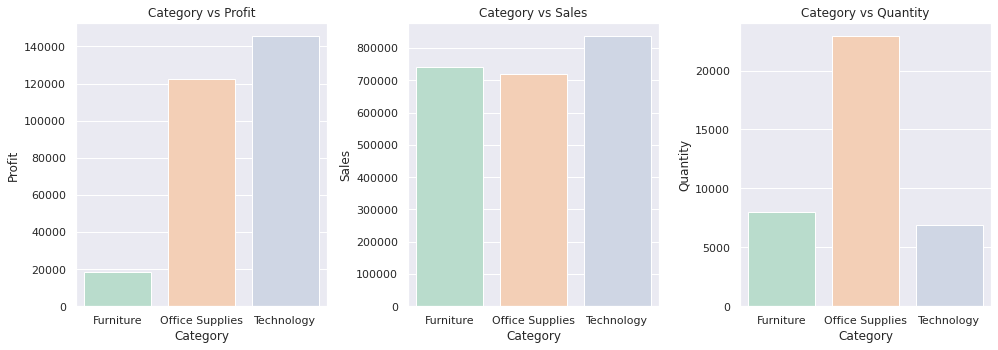

In [24]:
fig, axes = plt.subplots(1,3, figsize=(14,5))

sns.set_theme(style="darkgrid")
axes[0].set_title("Category vs Profit")
axes[1].set_title("Category vs Sales")
axes[2].set_title("Category vs Quantity")

sns.barplot(x=category_df.index,
           y='Profit',
           data=category_df,
           palette='Pastel2',
           ax=axes[0])

sns.barplot(x=category_df.index,
           y='Sales',
           data=category_df,
           palette='Pastel2',
           ax=axes[1])

sns.barplot(x=category_df.index,
           y='Quantity',
           data=category_df,
           palette='Pastel2',
           ax=axes[2])

plt.tight_layout(pad=1);

---
**Analysis :**

`Technology`는 주문 수량 자체는 많지 않으나 매출액과 순이익을 크게 가져오고 있습니다. 순이익을 증가시키기 위해서 `Technology` 카테고리를 확장시킬 필요가 있습니다.

---

## 5. Sub-Category

In [25]:
sub_category_df = pd.DataFrame(df.groupby(['Sub-Category'])[['Profit', 'Sales', 'Quantity']].sum())
sub_category_df.sort_values(by='Profit')

,Profit,Sales,Quantity
Sub-Category,,,
Tables,-17725.4811,206965.5320,1241
Bookcases,-3472.5560,114879.9963,868
Supplies,-1189.0995,46673.5380,647
Fasteners,949.5182,3024.2800,914
Machines,3384.7569,189238.6310,440
Labels,5546.2540,12486.3120,1400
Art,6527.7870,27118.7920,3000
Envelopes,6964.1767,16476.4020,906
Furnishings,13059.1436,91705.1640,3563


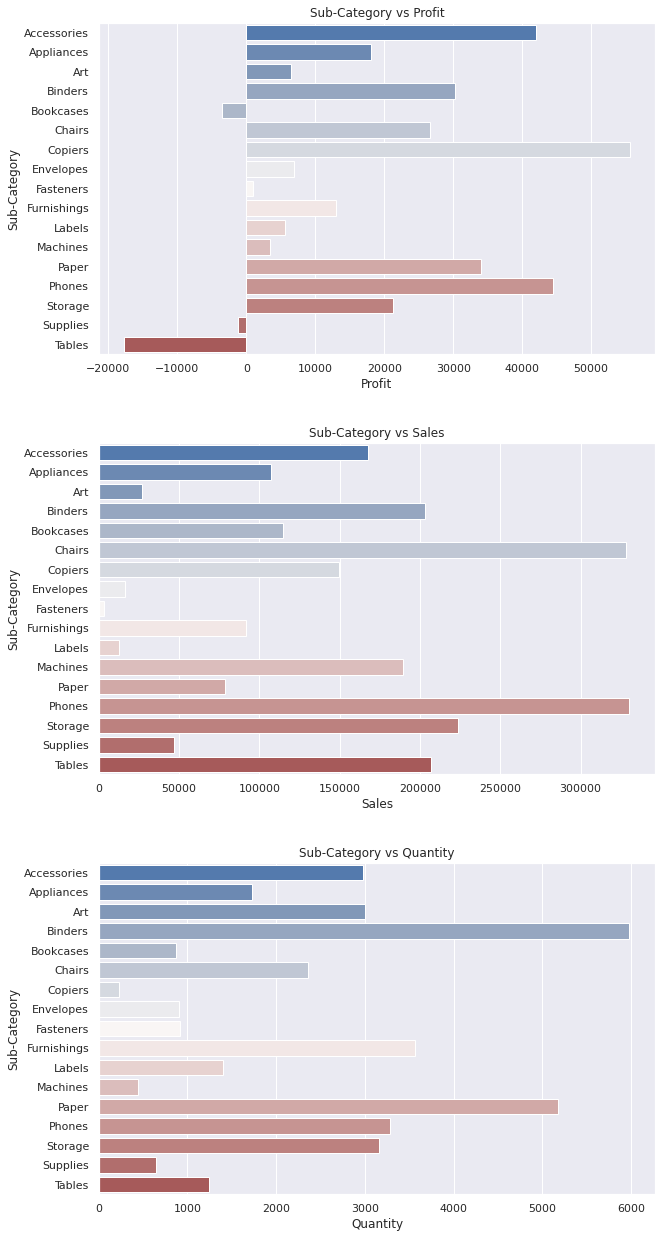

In [26]:
fig, axes = plt.subplots(3,1, figsize=(10,18))

sns.set_theme(style="darkgrid")
axes[0].set_title("Sub-Category vs Profit")
axes[1].set_title("Sub-Category vs Sales")
axes[2].set_title("Sub-Category vs Quantity")

sns.barplot(y=sub_category_df.index,
           x='Profit',
           data=sub_category_df,
           palette='vlag',
           ax=axes[0])

sns.barplot(y=sub_category_df.index,
           x='Sales',
           data=sub_category_df,
           palette='vlag',
           ax=axes[1])

sns.barplot(y=sub_category_df.index,
           x='Quantity',
           data=sub_category_df,
           palette='vlag',
           ax=axes[2])

plt.tight_layout(pad=3);

---
**Analysis :**

`copiers`, `accesories`, `phones`의 매출액과 순이익이 크다는 것을 확인할 수 있습니다.
특히 `phones`의 경우 매출액과 순이익이 모두 크기에 이 `Sub-Category`에 집중할 필요가 있겠습니다.

---

## 6. Cities

In [27]:
cities_df = pd.DataFrame(df.groupby(['City'])[['Profit', 'Sales', 'Quantity']].sum().sort_values('Profit',ascending = False))
top10 = cities_df.head(10)
last10 = cities_df.tail(10)

In [28]:
high_low = top10.append(last10)

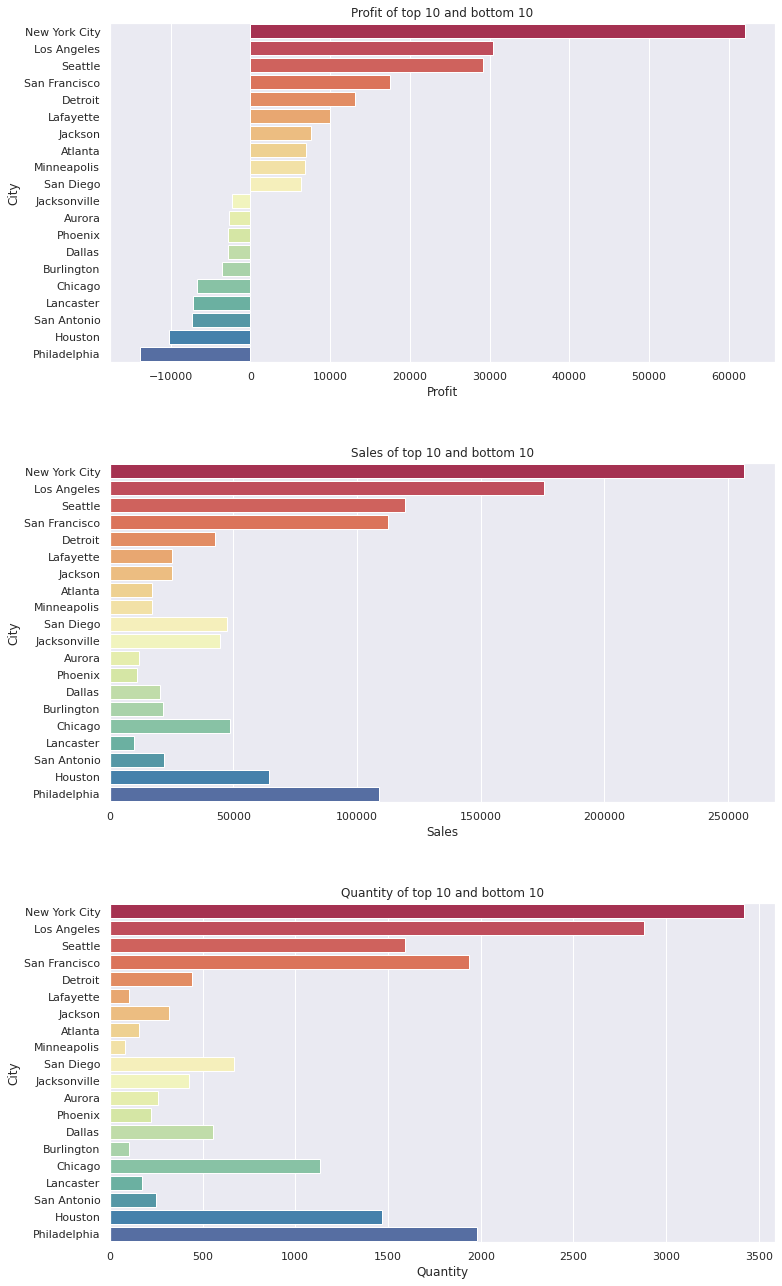

In [29]:
fig, axes = plt.subplots(3,1, figsize=(12, 19))

axes[0].set_title("Profit of top 10 and bottom 10")
axes[1].set_title("Sales of top 10 and bottom 10")
axes[2].set_title("Quantity of top 10 and bottom 10")

sns.barplot(y=high_low.index,
           x='Profit',
           data=high_low,
           palette='Spectral',
           ax=axes[0])

sns.barplot(y=high_low.index,
           x='Sales',
           data=high_low,
           palette='Spectral',
           ax=axes[1])

sns.barplot(y=high_low.index,
           x='Quantity',
           data=high_low,
           palette='Spectral',
           ax=axes[2])

plt.tight_layout(pad=4);

---
**Analysis:**

* `New York`에서 매출액과 순이익이 가장 큽니다.
* `Philadelphia`, `Houston`, `Chicago`에서의 매출과 판매량이 많음에도 이익은 마이너스입니다.

---

## **TIME-SERIES ANALYSIS**

In [30]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Date'] = df['Order Date'].dt.day
df['Weekday'] = df['Order Date'].dt.weekday
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month', 'Date', 'Weekday'],
      dtype='object')

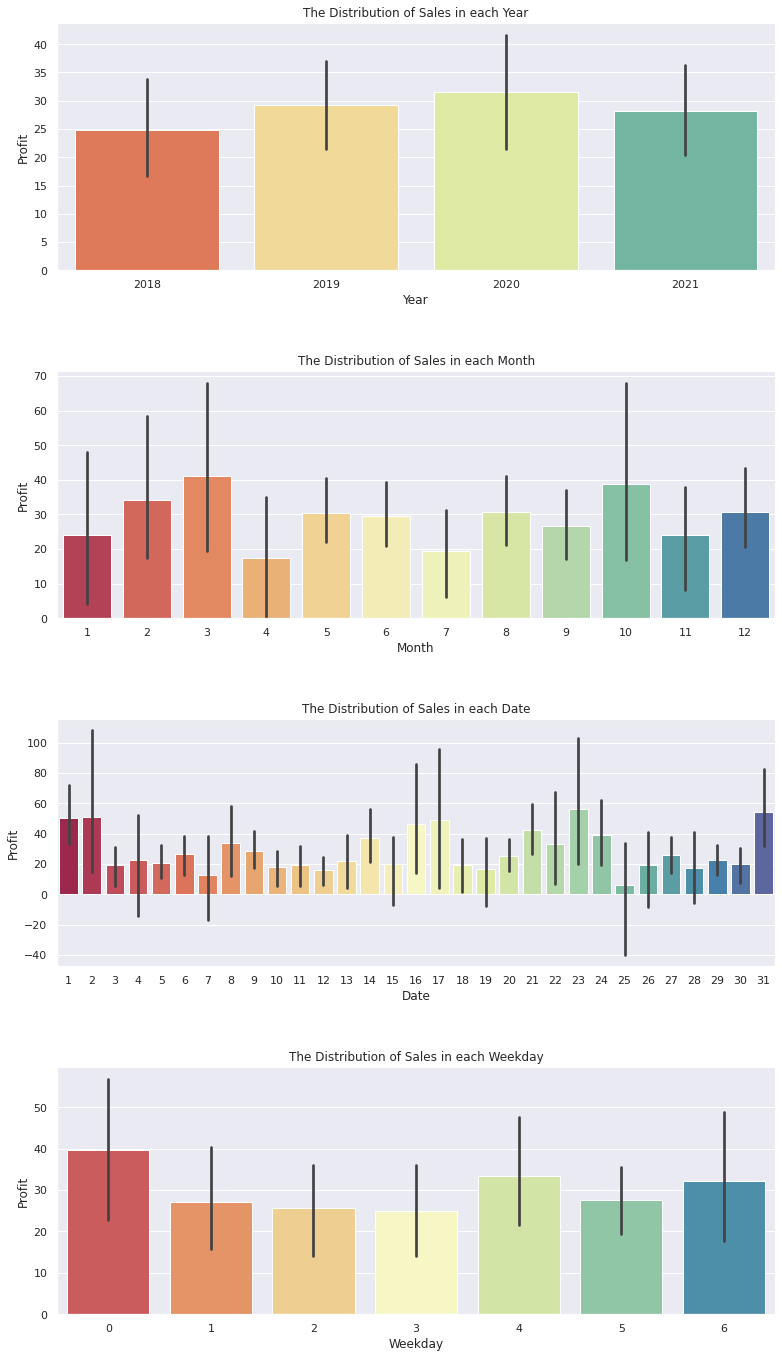

In [31]:
fig, axes = plt.subplots(4,1, figsize=(12, 20))

axes[0].set_title("The Distribution of Sales in each Year")
axes[1].set_title("The Distribution of Sales in each Month")
axes[2].set_title("The Distribution of Sales in each Date")
axes[3].set_title("The Distribution of Sales in each Weekday")

sns.barplot(y='Profit',
           x='Year',
           data=df,
           palette='Spectral',
           ax=axes[0])

sns.barplot(y='Profit',
           x='Month',
           data=df,
           palette='Spectral',
           ax=axes[1])

sns.barplot(y='Profit',
           x='Date',
           data=df,
           palette='Spectral',
           ax=axes[2])

sns.barplot(y='Profit',
           x='Weekday',
           data=df,
           palette='Spectral',
           ax=axes[3])


plt.tight_layout(pad=4);

## **TECHNOLOGIES ANALYSIS**



In [32]:
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [33]:
tech = df.loc[df['Category'] == 'Technology']
tech.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month', 'Date', 'Weekday'],
      dtype='object')

In [34]:
cols = ['Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment','Country/Region', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Discount', 'Year',
       'Month', 'Date', 'Weekday']
tech.drop(cols, axis=1, inplace=True)
tech = tech.sort_values('Order Date')
tech.isnull().sum()
tech

,Order Date,Sales,Quantity,Profit
7478,2018-01-06,755.960,4,204.1092
7477,2018-01-06,391.980,2,113.6742
593,2018-01-09,31.200,3,9.7500
765,2018-01-13,646.740,6,258.6960
1913,2018-01-15,149.950,5,65.9780
...,...,...,...,...
4924,2021-12-25,90.480,2,23.5248
2569,2021-12-27,164.388,2,-35.6174
573,2021-12-28,14.850,3,4.0095
1878,2021-12-29,302.376,3,22.6782


In [35]:
tech = tech.set_index('Order Date')

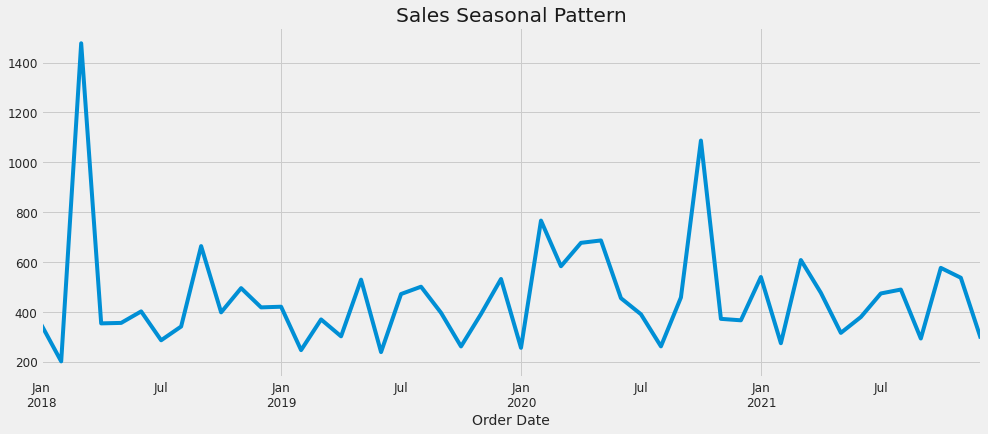

In [36]:
y_sales = tech['Sales'].resample('MS').mean()
y_sales.plot(figsize=(15, 6), title='Sales Seasonal Pattern')
plt.show()

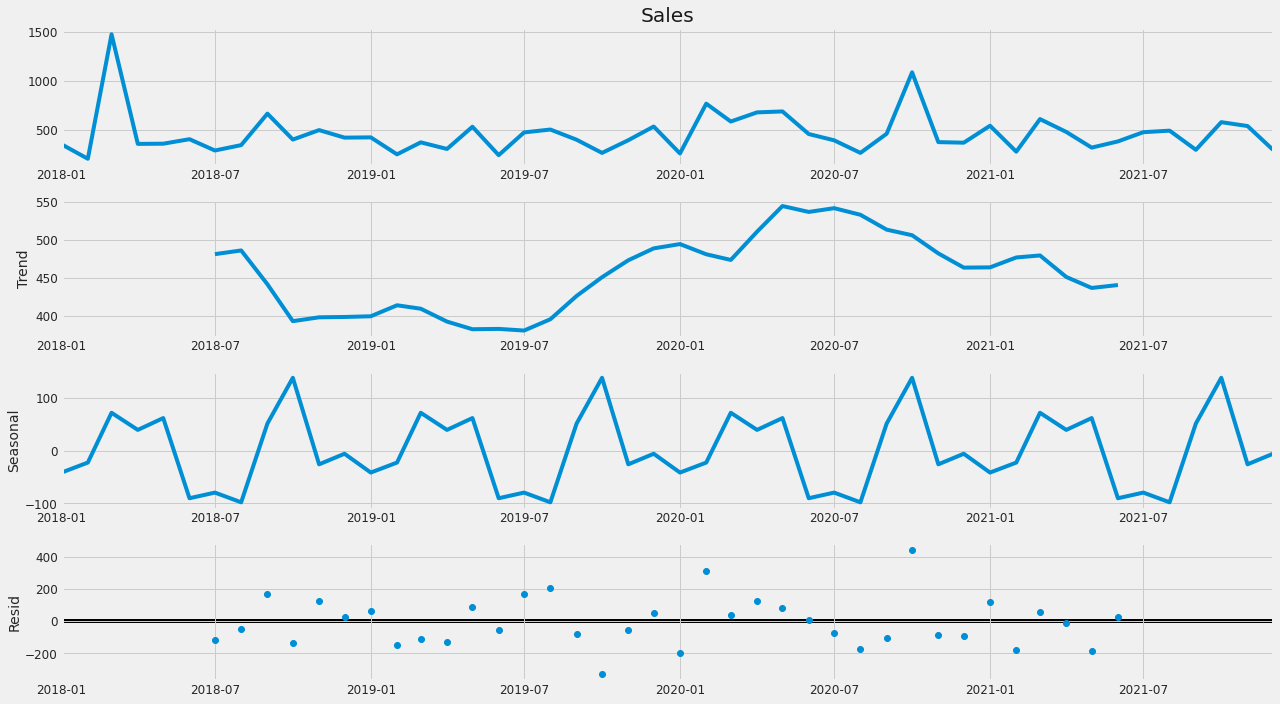

In [37]:
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(y_sales, model='additive')
fig = decomposition.plot()
plt.show()

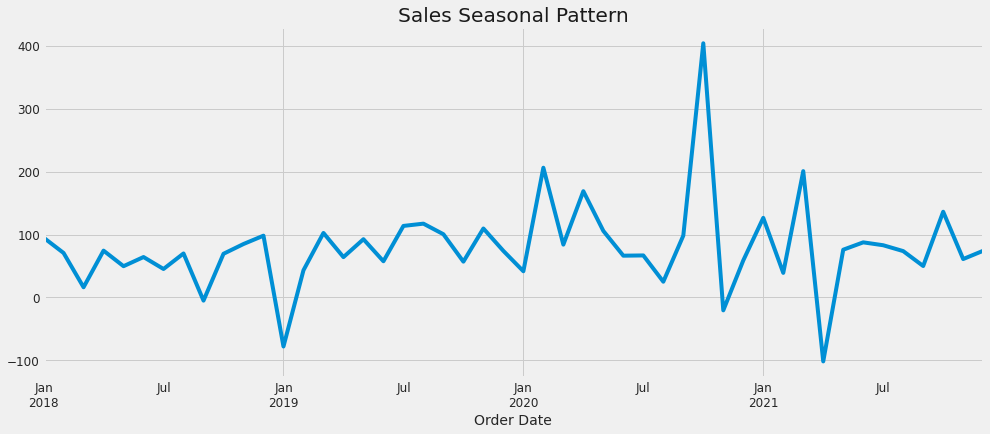

In [38]:
y_profit = tech['Profit'].resample('MS').mean()
y_profit.plot(figsize=(15, 6), title='Sales Seasonal Pattern')
plt.show()

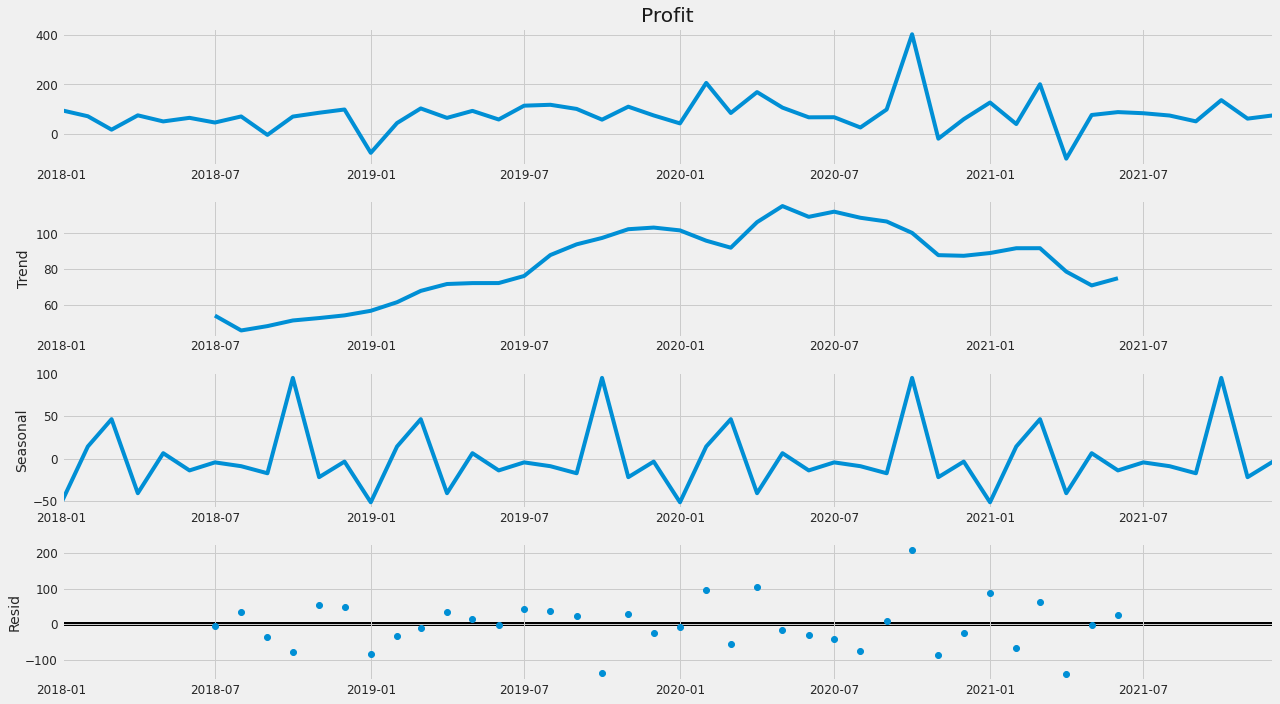

In [39]:
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(y_profit, model='additive')
fig = decomposition.plot()
plt.show()

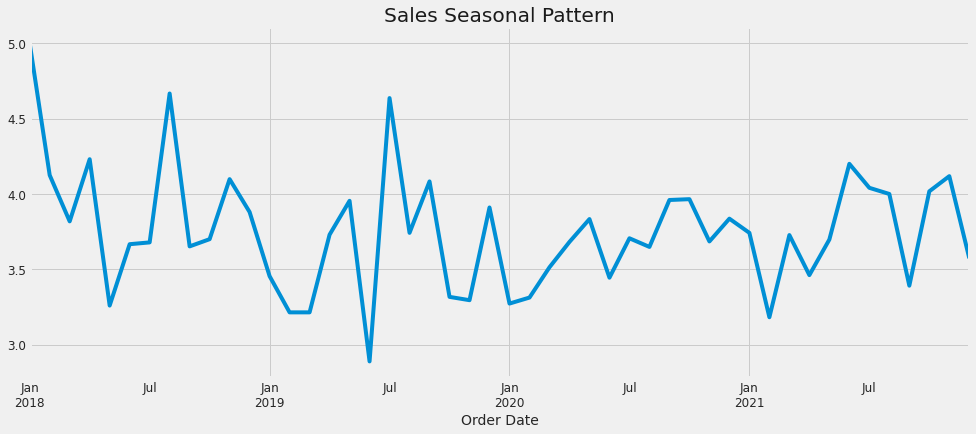

In [40]:
y_q = tech['Quantity'].resample('MS').mean()
y_q.plot(figsize=(15, 6), title='Sales Seasonal Pattern')
plt.show()

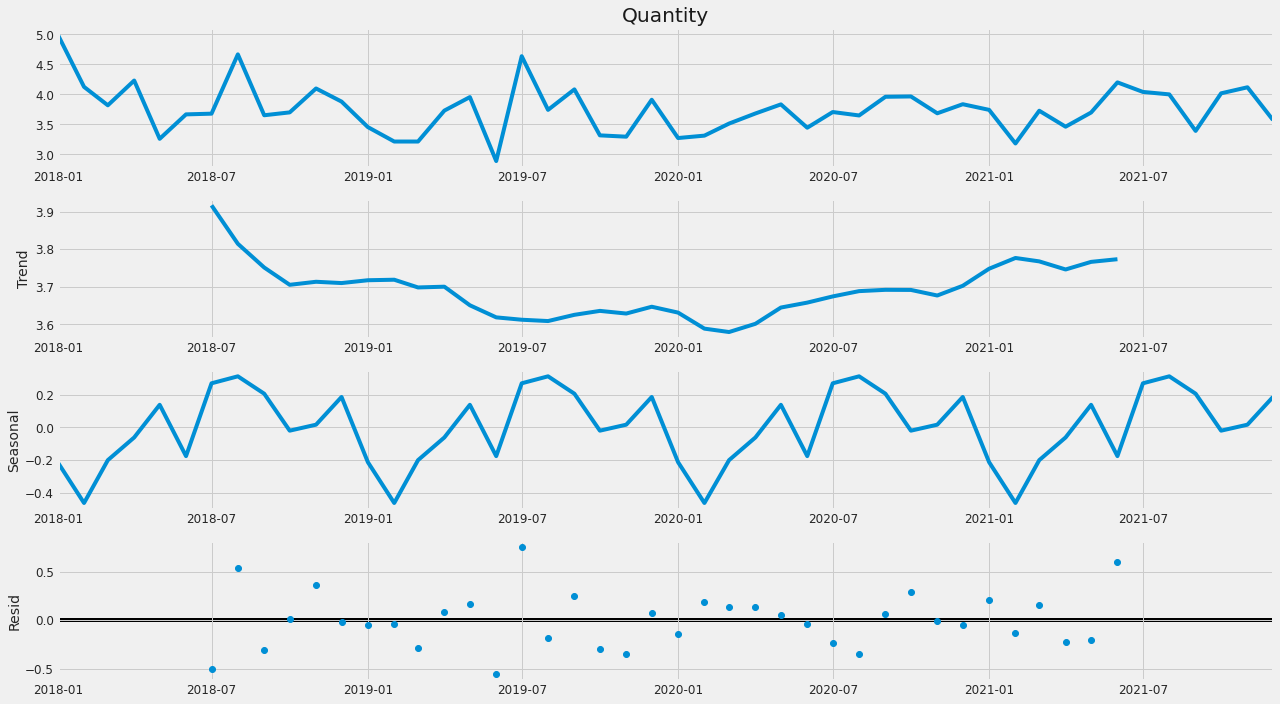

In [41]:
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(y_q, model='additive')
fig = decomposition.plot()
plt.show()

# Final Conclusions :

더 높은 순이익을 얻기 위해서 Superstore는 다음과 같은 사항을 고려해야 할 것입니다 :
* `phones`와 같은 `technologies` 카테고리에 집중할 필요가 있습니다. 판매수량 자체는 많지 않으나 높은 매출과 높은 이익을 가져오는 해당 시장에 집중해야 합니다.
* `bookcases`, `tables` 그리고 `supplies`의 판매는 손실로 이어지고 있습니다. 이 상품들을 `Machines`, `Copiers`, `Phones` 등과 묶어서 판매하거나, 아예 취급하지 않을 필요가 있습니다.
* 현재 `Furniture`는 전반적으로 손실을 내고 있습니다. 해당 카테고리 시장에서 철수하고 `Technologies` 카테고리 시장을 확장할 필요가 있습니다.

___

## 대시보드로 이어집니다 :)